# Boundaries layer Thickness

The objectives of this script are to compare the different scaling, and theory to the measurement made one the Coriolis Plateform at LEGI for Spin up experiments. 

Here we will define several Layer thicknesses describing at least 3 differents regimes:

- The classical boundary layer
- The Von karman layer (Rotating disk theory)
- The Turbulent Ekman layer

Briefly, we expect an initial growth of the Boundarie layer with two different behaviours depending on whether the water layer is stratified or not.

Then a limit of this growth determined by the diffusion of the momentum (Von Karman regime)

And finally the impact of the rotational effects on the flow (Turbulent Ekman regime)

**The aim is to characterise the effects of stratification and rotation regimes on boundary layer dynamics and to validate our experimental system.**


### Outline of the script
1. A Definition of Boundary layer $\delta_1$
2. Momentum thickness $
3. 

| Designation  | $T_{ini}$s | $T_{end}$s | $\Delta T$ °C | $N$ | $f$ | _Comment_ |_Temporal resolution PIV_ |
|--------------|------------|------------|---------------|-----|-----|-----------|-----------|
| **EXP01**    | 0          | 120        | 0             |     |  0   | Fail in camera acquisition ||
| **EXP02**    | 0          | 120        | 0             |     |  0   |           | |
| **EXP03**    | 120        | 60         | 0             |     |  0.104 |       | |
| **EXP04**    | 100        | 54.5       | 0             |     |  0.125 |  |Frequence btwn burts 1/s     |
| **EXP05**    | 80         | 48         | 0             |     |  0.157 | Fail in camera acquisition | Frequence btwn burts 4/s |
| **EXP06**    | 80         | 48         | 0             |     |  0.157 |    | Frequence btwn burts 4/s |
| **EXP07**    | 0          | 120        | 0             |     |  0   |           |Frequence btwn burts 5/s|
| **EXP08**    | 0          | 120        | 9°C           |     | 0   | optical refraction / mixing | Frequence btwn burts 5/s|
| **EXP09**    | 120        | 60         | 0             |     |  0.104 |       |Frequence btwn burts 5/s|
| **EXP10**    | 120        | 60         | 12°C          |     |  0.104 | optical refraction / mixing |Frequence btwn burts 5/s|
| **EXP11**    | 98         | 541        | 12°C          |     |  0.128 | Spin down |Frequence btwn burts 5/s|
| **EXP12**    | 0          | 120        | 19°C          | 0.24|  0   | Test Stereo x Stratif |Frequence btwn burts 5/s|
| **EXP13**    | 0          | 120        | 0             |     |  0   | Stereo    |Frequence btwn burts 5/s|
| **EXP14**    | 0          | 120        | 0             |     |  0   | Stereo    |Frequence btwn burts 5/s|
| **EXP15**    | 0          | 120        | 0             |     |  0   | Stereo + Colorant |Frequence btwn burts 5/s|
| **EXP16**    | 120        | 60         | 20°C          |     |  0.104 | Stereo + Colorant |Frequence btwn burts 5/s|
| **EXP17**    | 100        | 54.5       | 5°C           |     |  0.125 | Stereo + Colorant / Not enough particles to PIV |Frequence btwn burts 5/s|


The sliding averages is done one a 3 second period to decompose the component due to the mean flow $\overline{u}$ and the turbulent fluctuating part $u'$

In [55]:
# Physical parameters:
nu  = 1e-6    # in m^2 .s -1   ~ 1 cSt (centi-Stokes)
g   = 9.81    
day = 3600     

In [1]:
# Import all the library: 
 
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from netCDF4 import Dataset
import cmocean

In [2]:
# Importation of the function that manage the extraction of all the data from the `load_data.py' 

import load_data as data      # the py script `load_data.py' must be in the same folder than this notebook


In [3]:
# Accéder aux variables spécifiques

# list of each experiment for the different insrtuments=
nexp_adv =['02','03','04','05','06','07','08','09','10','11','13','14','15','16','17']
nexp_stereo =['12','13','14','15','16']
nexp_labview = ['05','06','07','08','09','10','12','13','14','15','16','17']
nexp_jai = ['04','06','07','08','09','10']


# Créer un dictionnaire pour stocker les variables de chaque expérience
time_stereo = {}
time_adv    = {}
time_jai    = {}
time_T      = {}

Coord_y_stereo = data.get_variable(str('EXP12'), 'STEREO', 'coord_y')
Coord_x_stereo = data.get_variable(str('EXP12'), 'STEREO', 'coord_x')
dy_stereo      = np.array(Coord_y_stereo[1]-Coord_y_stereo[0])
dx_stereo      = np.array(Coord_x_stereo[1]-Coord_x_stereo[0])

Coord_y_jai    = data.get_variable(str('EXP10'), 'JAI', 'coord_y')
dy_jai         = np.array(Coord_y_jai[1]-Coord_y_jai[0])

#Data Stereo
U_stereo    = {}; W_stereo    = {}; V_stereo    = {}; uprime_stereo = {}; wprime_stereo = {}; vprime_stereo = {};
ubar_stereo = {}; wbar_stereo = {}; vbar_stereo = {};
uu_stereo   = {};  ww_stereo  = {}; uw_stereo   = {}; vw_stereo     = {}; vv_stereo = {}; 

#Data JAI
U_jai       = {}; W_jai       = {}; uprime_jai  = {}; wprime_jai    = {}; ubar_jai    = {}; wbar_jai    = {};
uu_jai  = {};  ww_jai  = {};  uw_jai  = {}

#DATA ADV
U_adv       = {}; V_adv       = {};




# Définir les variables de temps pour chaques expériences
for exp in nexp_adv :
    time_adv[str('EXP'+exp)]  = data.get_variable(str('EXP'+exp), 'ADV', 'time')
    U_adv[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'ADV', 'u') 
    V_adv[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'ADV', 'v')
    
for exp in nexp_jai :
    time_jai[str('EXP'+exp)]   = data.get_variable(str('EXP'+exp), 'JAI', 'Time')
    U_jai[str('EXP'+exp)]      = data.get_variable(str('EXP'+exp), 'JAI', 'U') 
    W_jai[str('EXP'+exp)]      = data.get_variable(str('EXP'+exp), 'JAI', 'W')
    uprime_jai[str('EXP'+exp)] = data.get_variable(str('EXP'+exp), 'JAI', 'Uprime') 
    wprime_jai[str('EXP'+exp)] = data.get_variable(str('EXP'+exp), 'JAI', 'Wprime')
    ubar_jai[str('EXP'+exp)]   = data.get_variable(str('EXP'+exp), 'JAI', 'Ubar') 
    wbar_jai[str('EXP'+exp)]   = data.get_variable(str('EXP'+exp), 'JAI', 'Wbar')
    uu_jai[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'JAI', 'uu') 
    uw_jai[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'JAI', 'uw')
    ww_jai[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'JAI', 'ww')
    
for exp in nexp_stereo :
    time_stereo[str('EXP'+exp)]    = data.get_variable(str('EXP'+exp), 'STEREO', 'Time')
    U_stereo[str('EXP'+exp)]      = data.get_variable(str('EXP'+exp), 'STEREO', 'U') 
    W_stereo[str('EXP'+exp)]      = data.get_variable(str('EXP'+exp), 'STEREO', 'W')
    V_stereo[str('EXP'+exp)]      = data.get_variable(str('EXP'+exp), 'STEREO', 'V')
    uprime_stereo[str('EXP'+exp)] = data.get_variable(str('EXP'+exp), 'STEREO', 'Uprime') 
    wprime_stereo[str('EXP'+exp)] = data.get_variable(str('EXP'+exp), 'STEREO', 'Wprime')
    vprime_stereo[str('EXP'+exp)] = data.get_variable(str('EXP'+exp), 'STEREO', 'Vprime')
    ubar_stereo[str('EXP'+exp)]   = data.get_variable(str('EXP'+exp), 'STEREO', 'Ubar')
    vbar_stereo[str('EXP'+exp)]   = data.get_variable(str('EXP'+exp), 'STEREO', 'Vbar')
    wbar_stereo[str('EXP'+exp)]   = data.get_variable(str('EXP'+exp), 'STEREO', 'Wbar')
    uu_stereo[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'STEREO', 'uu') 
    uw_stereo[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'STEREO', 'uw')
    ww_stereo[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'STEREO', 'ww')
    vw_stereo[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'STEREO', 'vw')
    vv_stereo[str('EXP'+exp)]     = data.get_variable(str('EXP'+exp), 'STEREO', 'vv')





In [63]:
# The Initial N (background stratification ) has been measured by eyes. 
f  = {}
N  = {}


f['EXP02']   = 0 ;f['EXP03']   = 0.104 ;  f['EXP04']   = 0.125;  f['EXP06']   = 0.157;  f['EXP07']   = 0;  f['EXP08']   = 0;  f['EXP09']   = 0.104;  f['EXP10']   = 0.104;  f['EXP11']   =0.128; f['EXP12']   = 0; f['EXP13']   = 0;  f['EXP14']   = 0; f['EXP15']   = 0; f['EXP16']   = 0.104; f['EXP17']   = 0.125;
N['EXP12']  = 0.24 

#  Boundary layer approximation 

## First definition : Displacement thickness 


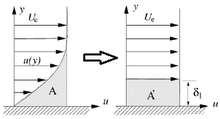

Source :https://fr.wikipedia.org/wiki/Couche_limite#/media/Fichier:Param%C3%A8tres_caract%C3%A9ristiques_de_la_couche_limites.png



If we consider A and A' to be surfaces such that : 
A = \int_{0}^{\infty} (U_{\infty} - u) $, \mathrm{d}y = A' = \delta_{1} U_{\infty}$.

Assuming $A=A'$, the _displacement thickness_ can be written as 
$$\delta_{1} = \frac{\int_{0}^{\infty} (U_{\infty} - u)}{U_{\infty}} \mathrm{d}y$$ 



**Reference** : Course _"Turbulence, diffusion and transport: Master Environmental Fluid Mechanics"_ **Joel Sommeria** p p90

Translated with www.DeepL.com/Translator (free version)

In [52]:
#Data JAI
d1_jai        = {}
d95_1_jai     = {}
d95_2_jai     = {}
Uinfty_jai    = {}
#Data Stereo
d1_stereo     = {}
d95_1_stereo  = {}
d95_2_stereo  = {}
Uinfty_stereo = {}

In [49]:
def delta_exp(num_exp,cam ):
    '''This function is aim to compute the displacement thickness: 
    Variable: 
    name_exp must be a string in the format 'EXPXX'  
    cam must by either jai or stereo'''

    # Setting parameter : 
    if cam == 'jai' : 
        time =  time_jai[num_exp]
        u    = -ubar_jai[num_exp]
        dy   =  dy_jai
        y    =  Coord_y_jai
        ny   =  Coord_y_jai.size
    elif cam=='stereo'  :
        time =  time_stereo[num_exp]
        u    = -ubar_stereo[num_exp]
        dy   =  dy_stereo
        y    =  Coord_y_stereo
        ny   =  Coord_y_stereo.size
    else : 
        return "The variable (cam) must by either 'jai' or 'stereo'"

    
    # Declaration of the outpu variables
    d1     = np.zeros(time.size)
    d95_1  = np.zeros(time.size) ; d95_2  = np.zeros(time.size)
    Uout   = np.zeros(time.size)
    
    
    #main programm
    for it in range (time.size):
        Umax = np.nanmax(u[:,it])
        idMax = (np.int64(np.where(u[:,it] == Umax)))[0][0]    # I look for the  maximum of velocity (in case of a buldge in presence of rotation)
        if cam == 'jai' : 
            Uinfty = np.nanmean(u[-40:,it],axis = 0)      # mean over the last 4cm por the JAI 
            Uout[it] = Uinfty
        elif cam=='stereo'  :
            Uinfty = np.nanmean(u[-10:,it],axis = 0)     # mean over the last 1cm por the Stereo
            Uout[it] = Uinfty    
        else : 
            print("'The variable (cam) must by either 'jai' or 'stereo''")
        #return   "The variable (cam) must by either 'jai' or 'stereo'"


        # With this condition we look if the maximum of the velocity is situated in the lower part of the column, 
        # If so we must 
        
        if idMax < 2 * ny // 3: 
            valid_indices_1 = np.arange(idMax + 1, len(u[:, it]))            # We only loof above the buldge 
            valid_values_1 = np.abs(u[valid_indices_1, it] - 0.95 * Uinfty)

            if np.all(np.isnan(valid_values_1)):
                id95_1 = -1  # Indicate no valid index found
            else:
                valid_values_1 = np.where(np.isnan(valid_values_1), np.inf, valid_values_1)
                id95_1 = valid_indices_1[np.nanargmin(valid_values_1)]

            valid_indices_2 = np.arange(0, idMax)                           # Here we look bellow 
            valid_values_2 = np.abs(u[valid_indices_2, it] - 0.95 * Uinfty)

            if np.all(np.isnan(valid_values_2)):
                #print(f"All values are NaN in the range < idMax for it = {it}")
                id95_2 = -1  # Indicate no valid index found
            else:
                valid_values_2 = np.where(np.isnan(valid_values_2), np.inf, valid_values_2)
                id95_2 = valid_indices_2[np.nanargmin(valid_values_2)]

            if id95_1 != -1:
                d95_1[it] = y[id95_1]
            else:
                d95_1[it] = np.nan  # Or any value to indicate NaN condition

            if id95_2 != -1:
                d95_2[it] = y[id95_2]
            else:
                d95_2[it] = np.nan  # Or any value to indicate NaN condition
        
        else : 
            
            id95_1 = np.nanargmin(np.abs(u[:,it]- 0.95*Uinfty))
            id95_2 = np.nanargmin(np.abs(u[:,it]- 0.95*Uinfty))
            d95_1[it] = y[id95_1]
            d95_2[it] = y[id95_2]
            
        
        d1[it]  = np.sum((1 - u[:,it]/Uinfty)*dy)
    return d1, d95_1,d95_2, Uout

#cam = 'stereo'
#exp_num='EXP12'

#d1, d95_1,d95_2,Uinfty = delta_exp(exp_num,cam )

In [53]:
cam = 'jai'   
for exp in nexp_jai :
    exp_num=str('EXP'+exp)
    d1_jai[str('EXP'+exp)]      = delta_exp(exp_num,cam)[0]
    d95_1_jai[str('EXP'+exp)]   = delta_exp(exp_num,cam)[1]
    d95_2_jai[str('EXP'+exp)]   = delta_exp(exp_num,cam)[2]
    Uinfty_jai[str('EXP'+exp)]  = delta_exp(exp_num,cam)[3]
    
cam = 'stereo'   
for exp in nexp_stereo :
    exp_num=str('EXP'+exp)
    d1_stereo[str('EXP'+exp)]      = delta_exp(exp_num,cam)[0]
    d95_1_stereo[str('EXP'+exp)]   = delta_exp(exp_num,cam)[1]
    d95_2_stereo[str('EXP'+exp)]   = delta_exp(exp_num,cam)[2]
    Uinfty_stereo[str('EXP'+exp)]  = delta_exp(exp_num,cam)[3]

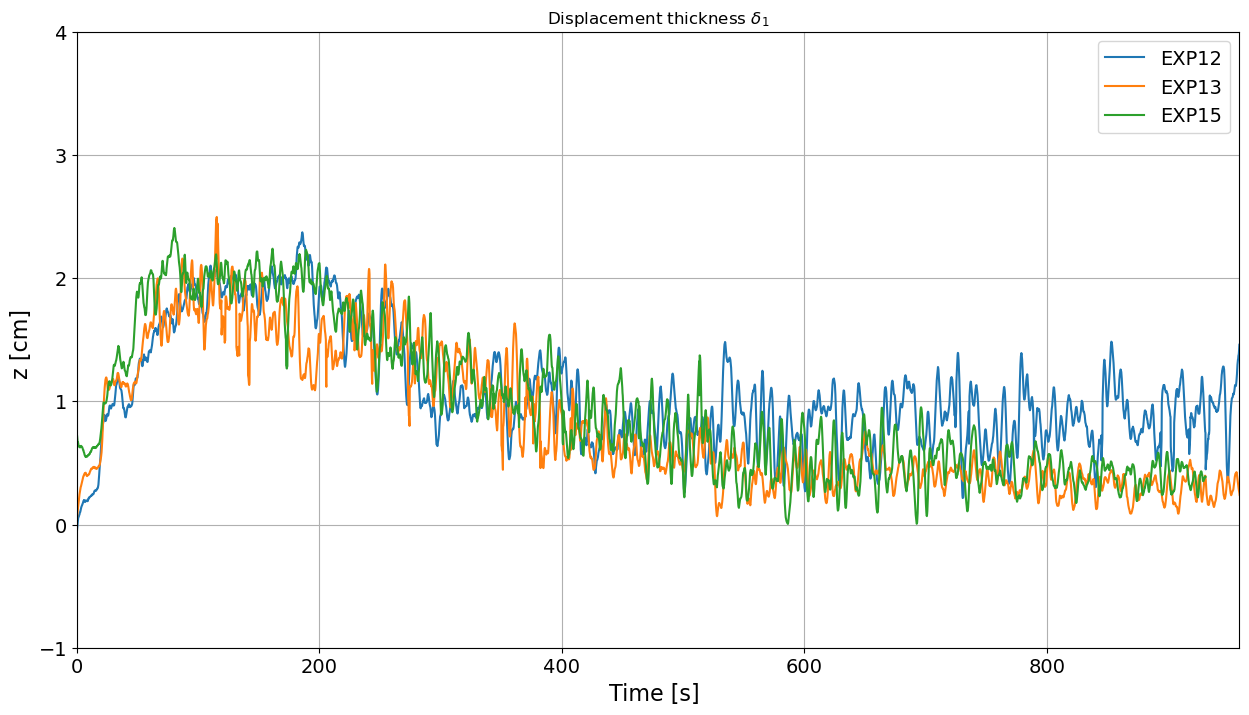

In [24]:
# Diplacement thickness depending on the stratification


plt.figure(figsize=(15,8))
plt.title(r'Displacement thickness $\delta_1$')
plt.plot(time_stereo['EXP12'],d1_stereo['EXP12'],label= 'EXP12')
plt.plot(time_stereo['EXP13'],d1_stereo['EXP13'],label= 'EXP13')
plt.plot(time_stereo['EXP15'],d1_stereo['EXP15'],label= 'EXP15')
plt.grid()
#plt.yscale('log')
plt.xlabel('Time [s] ', fontsize=16)
plt.ylabel(r'z [cm] ', fontsize=16)
plt.ylim(-1,4)
plt.xlim(0,time_stereo['EXP12'][-1])
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.show()



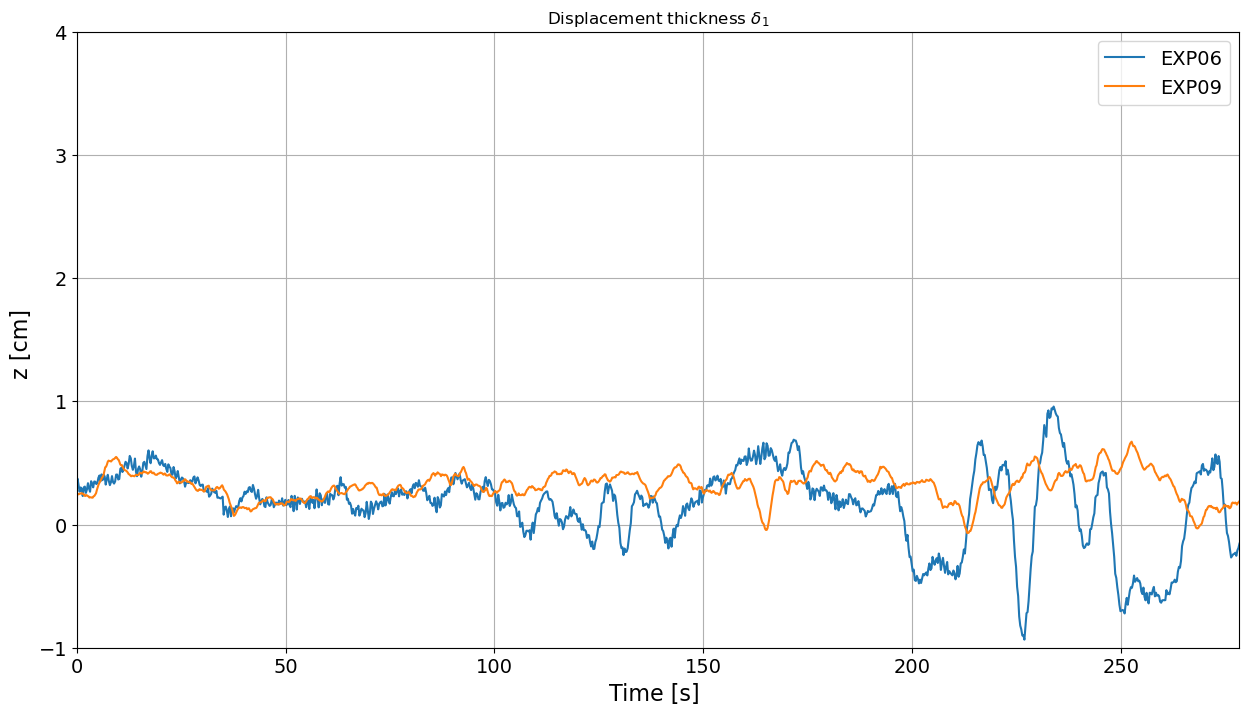

In [43]:
# Diplacement thickness depending on the rotation


plt.figure(figsize=(15,8))
plt.title(r'Displacement thickness $\delta_1$')
plt.plot(time_jai['EXP04'],d1_jai['EXP04'],label= 'EXP04')
plt.plot(time_jai['EXP06'],d1_jai['EXP06'],label= 'EXP06')
plt.plot(time_jai['EXP09'],d1_jai['EXP09'],label= 'EXP09')
plt.grid()
#plt.yscale('log')
plt.xlabel('Time [s] ', fontsize=16)
plt.ylabel(r'z [cm] ', fontsize=16)
plt.ylim(-1,4)
plt.xlim(0,time_jai['EXP09'][-1])
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.show()



## Second definition : $\delta_{95}$

Here we define the height limit $\delta_{95}$ such that $\overline{u}(z= \delta_{95}) = 95\% U_{\infty}$.  
The shape of the velocity profile do not allow me to use the usual $99 \%$ criterion .

- For initial growth, in the stratified case we expect to find **Pollard's law** (1973):

\begin{eqnarray}
  h(t) & = & \frac{u_*}{\sqrt{Nf}}\left[4(1-\cos(ft))\right] ^{1/4} \quad  t<\frac{T_f}{2} \\
        & = & 1.7\left(\frac{u_*}{\sqrt{Nf}} \right)   \quad t> \frac{T_f}{2}
        \label{P73}
\end{eqnarray}
with $(u_* = \sqrt{\frac{\tau}{\rho}})$ the friction velocity at the surface and we use the notation
\begin{equation}
    L_{P73} = \frac{u_*}{\sqrt{Nf}}
\end{equation} 
as characteristic length from the P73's scaling law.  
We also define from the equation (3.1) in the paper of P73 a characteristic velocity of the ML \(U_{p73}\)
\begin{equation}
   U_{p73} = \frac{u_*^2}{f L_{p73}} = u_*\sqrt{\frac{N}{f}}.
   \label{U_polard}
\end{equation}

This scaling law is used in a large number of models (\citeA{zilitinkevich_modeling_1979}, \citeA{lozovatsky_observations_2005}). It is particularly robust with no rotation since at short time, P73 reduced to the expression verified experimentally by \citeA{kato_penetration_1969}
\begin{equation}
    h(t)=u_* \left( 2\right)^{1/4} \sqrt{\frac{t}{N}}
\end{equation}

$$ h(t) = 2^{1/2} \frac{U_\infty}{ 20} \sqrt{\frac{t}{N}} \qquad (2) $$

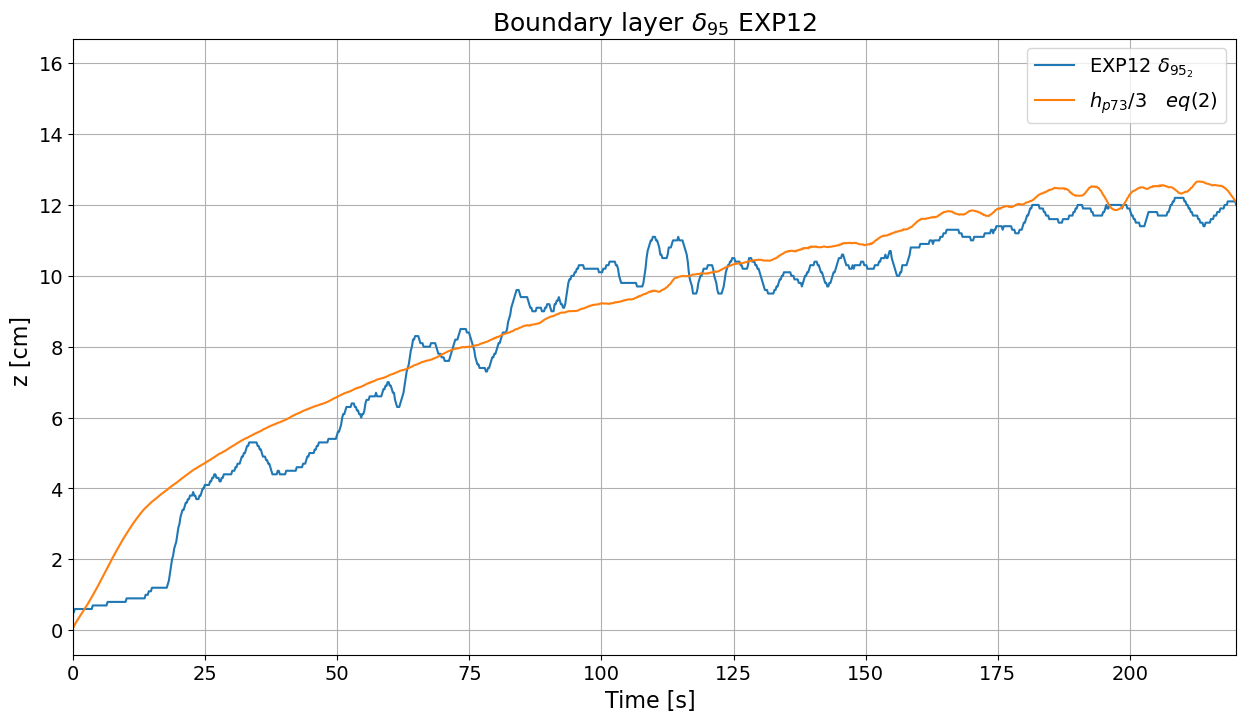

In [103]:
# Essaie sur EXP 12

BL = np.sqrt((nu*100)*time_stereo['EXP12']/Uinfty_stereo['EXP12'])
h_p73 = 2**(1/4) * Uinfty_stereo['EXP12']*np.sqrt(time_stereo['EXP12']/N['EXP12'])/20/3



plt.figure(figsize=(15,8))
plt.plot(time_stereo['EXP12'],d95_2_stereo['EXP12'],label= 'EXP12 $\delta_{95_2}$')
#plt.plot(time_stereo['EXP12'],BL,label= r'$\delta = \sqrt{\nu t /U_{\infty}}$')
plt.plot(time_stereo['EXP12'],h_p73,label= r'$h_{p73}/3 \quad eq(2)$')
plt.grid()
#plt.yscale('log')
#plt.xscale('log')
plt.title(r'Boundary layer $\delta_{95}$ EXP12',fontsize=18)
plt.xlabel('Time [s] ', fontsize=16)
plt.ylabel(r'z [cm] ', fontsize=16)
#plt.ylim(-1,15)
#plt.xlim(0,time_stereo['EXP12'][-1])
plt.xlim(0,220)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.show()



The plot above shows the initial growth of the $\delta_{95}$ height for EXP12. This experiment was a spin up with no initial rotation and a stratification of the order of $N = 0.24$ over the first 30 cm. The orange curve represents the theoretical value obtained from equation (2) **with a 1/3 factor**. In spite of this factor, we still find a law in $t^{1/2}$. 

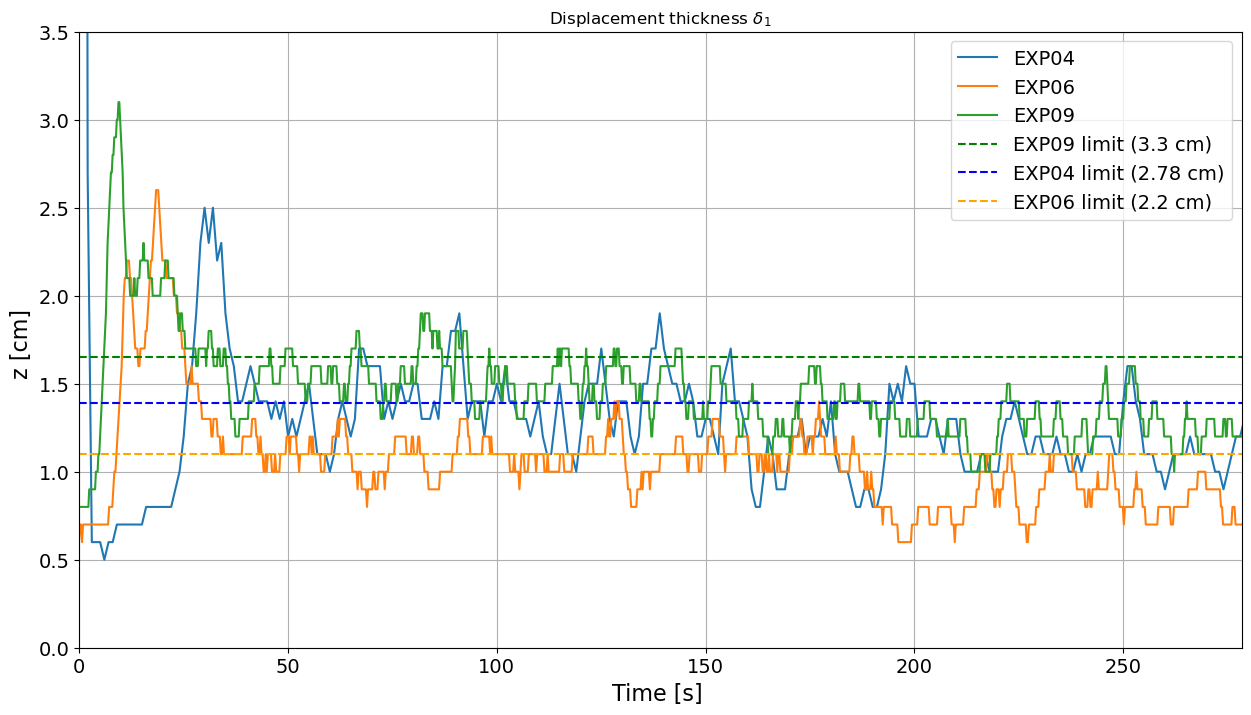

In [90]:
# Diplacement thickness depending on the rotation
alpha =0.5

plt.figure(figsize=(15,8))
plt.title(r'Boundary layer $\delta_{95}$ EXP12',fontsize=18)
plt.plot(time_jai['EXP04'],d95_2_jai['EXP04'],label= 'EXP04')
plt.plot(time_jai['EXP06'],d95_2_jai['EXP06'],label= 'EXP06')
plt.plot(time_jai['EXP09'],d95_2_jai['EXP09'],label= 'EXP09')
plt.axhline(y=3.3*alpha, color='g', linestyle='--', label='EXP09 limit (3.3 cm)')
plt.axhline(y=2.78*alpha, color='b', linestyle='--', label='EXP04 limit (2.78 cm)')
plt.axhline(y=2.2*alpha, color='orange', linestyle='--', label='EXP06 limit (2.2 cm)')
plt.grid()
#plt.yscale('log')
plt.xlabel('Time [s] ', fontsize=16)
plt.ylabel(r'z [cm] ', fontsize=16)
plt.ylim(0,3.5)
plt.xlim(0,time_jai['EXP09'][-1])
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.show()



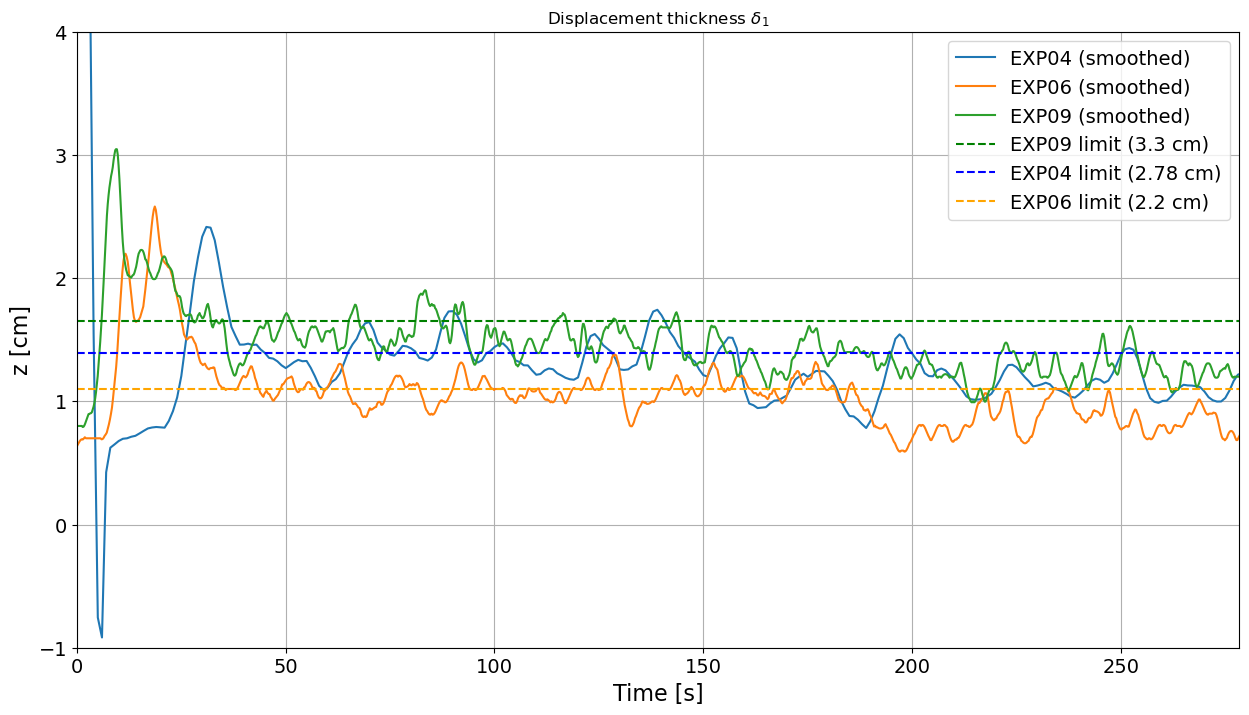

In [35]:
from scipy.signal import savgol_filter

# Paramètres pour le filtre Savitzky-Golay
window_length = 11  # Choisir un nombre impair
polyorder = 2  # Ordre du polynôme

# Lisser les données
d95_2_jai_smoothed_exp04 = savgol_filter(d95_2_jai['EXP04'], window_length, polyorder)
d95_2_jai_smoothed_exp06 = savgol_filter(d95_2_jai['EXP06'], window_length, polyorder)
d95_2_jai_smoothed_exp09 = savgol_filter(d95_2_jai['EXP09'], window_length, polyorder)

# Tracer les données lissées
plt.figure(figsize=(15,8))
plt.title(r'Boundary layer $\delta_{95}$ EXP12',fontsize=18)
plt.plot(time_jai['EXP04'], d95_2_jai_smoothed_exp04, label='EXP04 (smoothed)')
plt.plot(time_jai['EXP06'], d95_2_jai_smoothed_exp06, label='EXP06 (smoothed)')
plt.plot(time_jai['EXP09'], d95_2_jai_smoothed_exp09, label='EXP09 (smoothed)')

plt.axhline(y=3.3*alpha, color='g', linestyle='--', label='EXP09 limit (3.3 cm)')
plt.axhline(y=2.78*alpha, color='b', linestyle='--', label='EXP04 limit (2.78 cm)')
plt.axhline(y=2.2*alpha, color='orange', linestyle='--', label='EXP06 limit (2.2 cm)')
plt.grid()
# plt.yscale('log')
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel(r'z [cm]', fontsize=16)
plt.ylim(-1, 4)
plt.xlim(0, time_jai['EXP09'][-1])
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)
plt.show()

# Momentum thickness


We can define 

**Reference** : Course _"Turbulence, diffusion and transport: Master Environmental Fluid Mechanics"_ **Joel Sommeria** p p94

# Ekman Boundary layer  

**Reference** : Course _"Turbulence, diffusion and transport: Master Environmental Fluid Mechanics"_ **Joel Sommeria** p p96

Ekman transverse flux :
$$\int_0^{\infty} u_r dz = -\frac{u_*^2}{f}$$  
Voir **Sous et al, 2013**

In [44]:
# This numerical code is only adaptable for Stereo data since it rely on radial componante of the velocity 

def EK_flux(num_exp):
    '''This function is aim to compute Ekman flux: 
    Variable: 
    name_exp must be a string in the format 'EXPXX'  
    cam must by either stereo '''
    

    time =  time_stereo[num_exp]
    u    = -ubar_stereo[num_exp]
    dy   =  dy_stereo
    y    =  Coord_y_stereo
    ny   =  Coord_y_stereo.size
    w    = 
    
    flx_Ek  = 
    
    #main programm
    for it in range (time.size):
        Umax = np.nanmax(u[:,it])
        idMax = (np.int64(np.where(u[:,it] == Umax)))[0][0]    # I look for the  maximum of velocity (in case of a buldge in presence of rotation)
        if cam == 'jai' : 
            Uinfty = np.nanmean(u[-40:,it],axis = 0)      # mean over the last 4cm por the JAI 

        elif cam=='stereo'  :
            Uinfty = np.nanmean(u[-10:,it],axis = 0)     # mean over the last 1cm por the Stereo

        else : 
            print("'The variable (cam) must by either 'jai' or 'stereo''")
        #return   "The variable (cam) must by either 'jai' or 'stereo'"


        # With this condition we look if the maximum of the velocity is situated in the lower part of the column, 
        # If so we must 
        
        if idMax < 2 * ny // 3: 
            valid_indices_1 = np.arange(idMax + 1, len(u[:, it]))            # We only loof above the buldge 
            valid_values_1 = np.abs(u[valid_indices_1, it] - 0.95 * Uinfty)

            if np.all(np.isnan(valid_values_1)):
                id95_1 = -1  # Indicate no valid index found
            else:
                valid_values_1 = np.where(np.isnan(valid_values_1), np.inf, valid_values_1)
                id95_1 = valid_indices_1[np.nanargmin(valid_values_1)]

            valid_indices_2 = np.arange(0, idMax)                           # Here we look bellow 
            valid_values_2 = np.abs(u[valid_indices_2, it] - 0.95 * Uinfty)

            if np.all(np.isnan(valid_values_2)):
                #print(f"All values are NaN in the range < idMax for it = {it}")
                id95_2 = -1  # Indicate no valid index found
            else:
                valid_values_2 = np.where(np.isnan(valid_values_2), np.inf, valid_values_2)
                id95_2 = valid_indices_2[np.nanargmin(valid_values_2)]
©
            if id95_1 != -1:
                d95_1[it] = y[id95_1]
            else:
                d95_1[it] = np.nan  # Or any value to indicate NaN condition

            if id95_2 != -1:
                d95_2[it] = y[id95_2]
            else:
                d95_2[it] = np.nan  # Or any value to indicate NaN condition
        
        else : 
            
            id95_1 = np.nanargmin(np.abs(u[:,it]- 0.95*Uinfty))
            id95_2 = np.nanargmin(np.abs(u[:,it]- 0.95*Uinfty))
            d95_1[it] = y[id95_1]
            d95_2[it] = y[id95_2]
            
        
        d1[it]  = np.sum((1 - u[:,it]/Uinfty)*dy)
    return d1, d95_1,d95_2 

cam = 'stereo'
exp_num='EXP12'

d1, d95_1,d95_2 = delta_exp(exp_num,cam )

Different plot to have : 
-Ekman spirale, 